In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input
import itertools
from keras.losses import binary_crossentropy
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
from sklearn import random_projection
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture as GMM

In [20]:
df = pd.read_csv("UCI_Credit_Card.csv")
df=df.drop(columns='ID')
df = df.rename(columns = {'default.payment.next.month':'default_class'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_class
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [21]:
### Dropping the categorical data
df.drop(columns = ['SEX','EDUCATION','MARRIAGE'],inplace=True)

In [22]:
df.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_class
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [26]:
q1= df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1   ###Inter-Quartile Range

upper_threshold = q3 + (1.5 * IQR)
lower_threshold = q1 - (1.5 * IQR)

outliers = dict()
column = 0
for upper,lower in zip(upper_threshold,lower_threshold):
    outliers_count = df[df.iloc[:,column]>math.ceil(upper)].shape[0] + df[df.iloc[:,column]<math.floor(lower)].shape[0]
    outliers[df.columns[column]] = outliers_count
    column = column + 1

In [27]:
outliers

{'LIMIT_BAL': 167,
 'AGE': 216,
 'PAY_0': 463,
 'PAY_2': 483,
 'PAY_3': 390,
 'PAY_4': 349,
 'PAY_5': 342,
 'PAY_6': 313,
 'BILL_AMT1': 2400,
 'BILL_AMT2': 2395,
 'BILL_AMT3': 2469,
 'BILL_AMT4': 2622,
 'BILL_AMT5': 2725,
 'BILL_AMT6': 2693,
 'PAY_AMT1': 2745,
 'PAY_AMT2': 2714,
 'PAY_AMT3': 2598,
 'PAY_AMT4': 2993,
 'PAY_AMT5': 2945,
 'PAY_AMT6': 2958,
 'default_class': 6636}

### Feature Scaling

In [28]:
def feature_scaling(df_unscaled):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_unscaled)
    scaled_data = pd.DataFrame(scaled_data, columns = df_unscaled.columns)
    return(scaled_data)

### Silhouette Scores plot

In [225]:
def silhouette_plot(silhouette_scores):
    plt.plot(range(2, 11), silhouette_scores,marker='o')
    plt.title('Silhouette scores for each cluster',fontsize=15)
    plt.xlabel('Number of clusters',fontsize=15)
    plt.ylabel('Silhouette Scores',fontsize=15)
    plt.show()

In [29]:
df_temp=df.loc[:, df.columns != 'default_class']
df_scaled=feature_scaling(df_temp)

### K-Means Clustering

In [219]:
silhouette_scores = []
for cluster in range (2,11):
    kmeans = KMeans(n_clusters=cluster, max_iter=300,random_state=0)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))

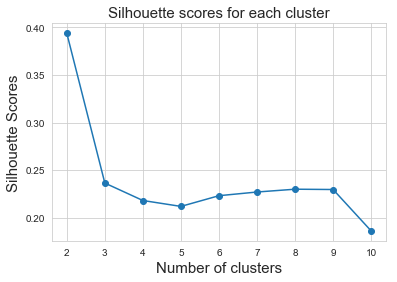

In [226]:
silhouette_plot(silhouette_scores)

In [256]:
kmeans = KMeans(n_clusters=2, max_iter=600,random_state=0)
kmeans.fit(df_scaled)
clusters = pd.DataFrame(kmeans.labels_+1,columns=['Cluster'])
df.index = clusters.index
df_cluster_kmeans = pd.concat([df,clusters],axis=1)
cluster_obs = pd.DataFrame(clusters['Cluster'].value_counts()).reset_index()
cluster_obs.columns = ['Cluster','no_of_observations']

### Observations in each cluster

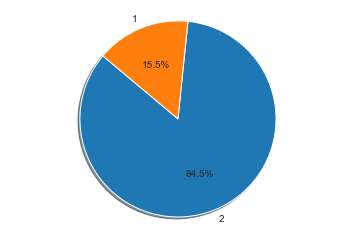

In [229]:
plt.pie(cluster_obs['no_of_observations'],labels=cluster_obs['Cluster'],autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


In [120]:
df_cluster.reset_index(drop=True, inplace=True)
target = pd.DataFrame(df['default_class'])
target.reset_index(drop=True,inplace=True)
df_cluster_kmeans = pd.concat([df_cluster,target],axis=1)

In [ ]:
# for i in df_cluster_kmeans.columns:
#     for j in df_cluster_kmeans.columns:
#         sns.lmplot(data=df_cluster_kmeans, x=i, y=j, hue='Cluster', fit_reg=False, legend=True, scatter_kws={"s": 2},legend_out=True)
#         plt.show()

In [262]:
df_cluster_kmeans.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_class', 'Cluster'],
      dtype='object')

In [274]:
df_cluster_kmeans.groupby('Cluster').mean()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_class
Cluster,,,,,,,,,,,,,,,,,,,,,
1,259374.098431,36.721900,0.345798,0.327960,0.299592,0.254889,0.225876,0.223942,179650.725983,176898.634644,...,161122.619815,150824.244573,145298.677198,14447.109392,15367.557705,13254.938319,11656.965184,11619.170643,11992.181603,0.213411
2,150615.930879,35.258532,-0.083245,-0.218527,-0.251706,-0.307965,-0.356531,-0.385647,27647.654515,25733.337594,...,21627.211070,20024.334990,19334.756263,4051.170355,4187.069831,3751.734604,3572.116897,3547.466288,3971.493905,0.222630


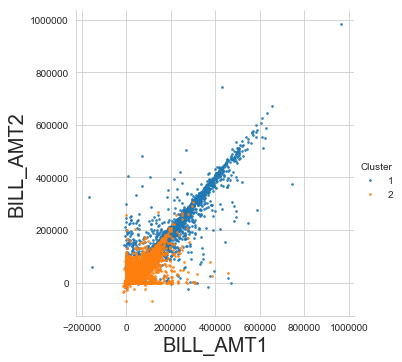

In [272]:
sns.lmplot(data=df_cluster_kmeans, x='BILL_AMT1', y='BILL_AMT2', hue='Cluster', fit_reg=False,scatter_kws={"s": 3})
plt.xlabel('BILL_AMT1',fontsize=20)
plt.ylabel('BILL_AMT2',fontsize=20)
plt.show()

### Expectation Maximisation

In [184]:
silhouette_scores = []
for cluster in range (2,11):
    em = GMM(n_components=cluster)
    cluster_labels = em.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))

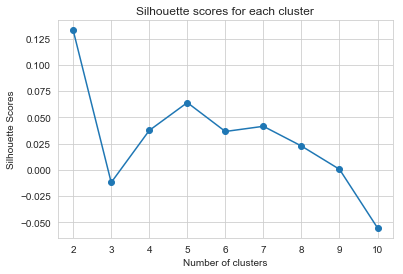

In [186]:
silhouette_plot(silhouette_scores)

In [269]:
em = GMM(n_components=2,random_state=0)
cluster_labels = em.fit_predict(df_scaled)
clusters = pd.DataFrame(cluster_labels+1,columns=['Cluster'])
df_cluster_em = pd.concat([df,clusters],axis=1)
cluster_obs = pd.DataFrame(clusters['Cluster'].value_counts()).reset_index()
cluster_obs.columns = ['Cluster','no_of_observations']

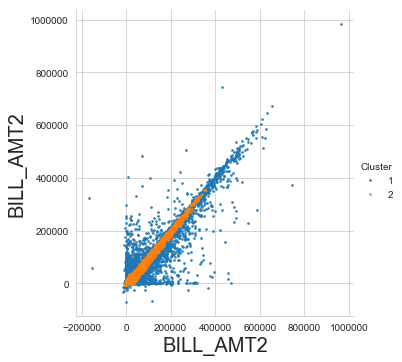

In [271]:
sns.lmplot(data=df_cluster_em, x='BILL_AMT1', y='BILL_AMT2', hue='Cluster', fit_reg=False,scatter_kws={"s": 3})
plt.xlabel('BILL_AMT1',fontsize=20)
plt.ylabel('BILL_AMT2',fontsize=20)
plt.show()

### Decision Tree

In [77]:
x=df.loc[:, df.columns != 'default_class']
y=df['default_class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

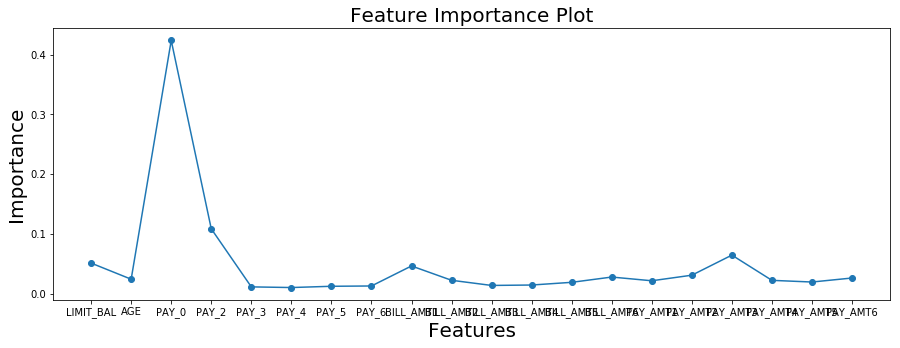

In [78]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features=0.8)  
clf.fit(X_train,y_train)
best_features=dict(zip(X_train.columns, clf.feature_importances_.round(4)))
best_features=pd.DataFrame(best_features,index=['Importance']).T
plt.figure(figsize=(15,5))
plt.plot(best_features,marker='o')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Importance',fontsize=20)
plt.title('Feature Importance Plot',fontsize=20)
plt.show()

In [81]:
best_features.sort_values(by=['Importance']).tail()
### PAY0, PAY2, PAY_AMT3, LIMIT_BAL

,Importance
BILL_AMT1,0.0472
LIMIT_BAL,0.0520
PAY_AMT3,0.0653
PAY_2,0.1092
PAY_0,0.4235


In [187]:
df_dt = df_scaled.loc[:,['PAY_0','PAY_2','PAY_AMT3','LIMIT_BAL','BILL_AMT1']]

### PCA

In [122]:
pca = PCA(0.90)
principalComponents = pca.fit_transform(df_scaled)
print("Number of components explaining 90% of variance: ",len(pca.explained_variance_ratio_))
pca.explained_variance_ratio_


Number of components explaining 90% of variance:  10


array([0.32691551, 0.20310814, 0.07543899, 0.05014194, 0.0461459 ,
       0.04440639, 0.04368688, 0.03918403, 0.03663652, 0.03502348])

In [123]:
df_pca = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
# df_pca = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2','PC3'])


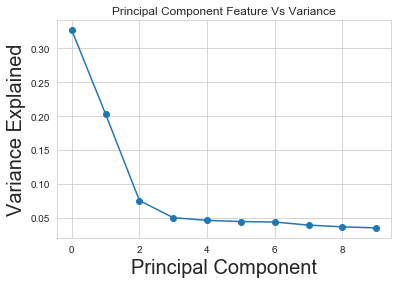

In [124]:
plt.plot(pca.explained_variance_ratio_,marker='o')
plt.title("Principal Component Feature Vs Variance")
plt.ylabel("Variance Explained",fontsize=20)
plt.xlabel("Principal Component",fontsize=20)
plt.show()

### ICA

In [125]:
ica = FastICA(random_state=0)
independentComponents = pd.DataFrame(ica.fit_transform(df_scaled),columns = df_scaled.columns)
df_kurtosis = pd.DataFrame(kurtosis(independentComponents),index=df_scaled.columns,columns=['kurtosis_value'])

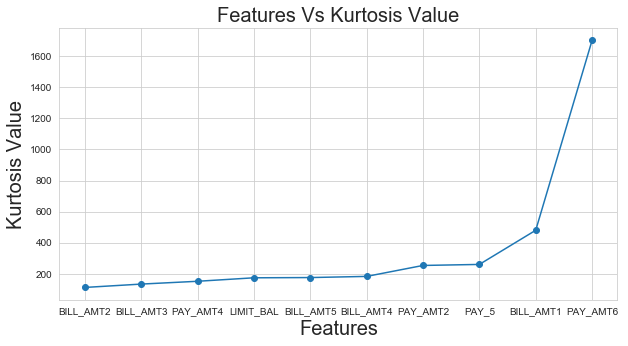

In [275]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.plot(df_kurtosis.sort_values(by=['kurtosis_value']).tail(10),marker='o')
plt.title("Features Vs Kurtosis Value",fontsize=20)
plt.xlabel("Features",fontsize=20)
plt.ylabel("Kurtosis Value",fontsize=20)
plt.show()


In [160]:
df_kurtosis.sort_values(by=['kurtosis_value']).tail()

###PAY_AMT6, BILL_AMT1, PAY_5, PAY_AMT2, BILL_AMT4

,kurtosis_value
BILL_AMT4,183.446464
PAY_AMT2,253.850602
PAY_5,260.461003
BILL_AMT1,480.125114
PAY_AMT6,1701.270950


In [128]:
df_ica = independentComponents.loc[:,['PAY_AMT6', 'BILL_AMT1', 'PAY_5','PAY_AMT2','BILL_AMT4']]

### Randomized Projections 

In [129]:
rca = random_projection.GaussianRandomProjection(n_components=10)
df_rca = pd.DataFrame(rca.fit_transform(df_scaled),columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

### Clustering Algorithms after dimensionality reduction 

### Clustering on Decision Tree

In [298]:
silhouette_scores = []
for cluster in range (2,11):
    kmeans = KMeans(n_clusters=cluster, max_iter=300,random_state=0)
    kmeans.fit(df_dt)
    cluster_labels = kmeans.fit_predict(df_dt)
    silhouette_scores.append(silhouette_score(df_dt, cluster_labels))

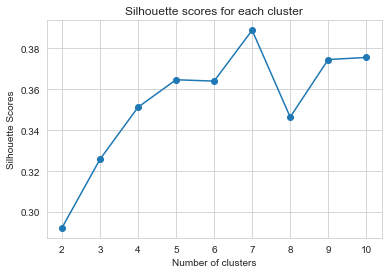

In [299]:
plt.plot(range(2, 11), silhouette_scores,marker='o')
plt.title('Silhouette scores for each cluster')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.show()

### 2 can be taken as the number of clusters

In [302]:
kmeans = KMeans(n_clusters=7, max_iter=600,random_state=0)
kmeans.fit(df_dt)
clusters = pd.DataFrame(kmeans.labels_+1,columns=['Cluster'])
df_dt_kmeans = pd.concat([df_dt,clusters],axis=1)
cluster_obs = pd.DataFrame(clusters['Cluster'].value_counts()).reset_index()
cluster_obs.columns = ['Cluster','no_of_observations']

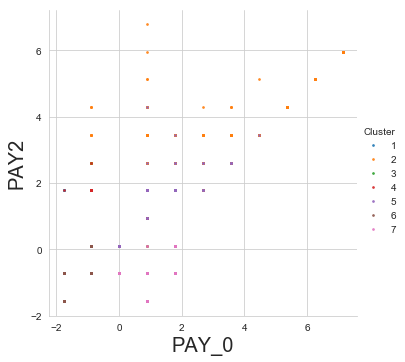

In [305]:
sns.lmplot(data=df_dt_kmeans, x='PAY_0', y='PAY_2', hue='Cluster', fit_reg=False,scatter_kws={"s": 3})
plt.xlabel('PAY_0',fontsize=20)
plt.ylabel('PAY2',fontsize=20)
plt.show()

### K-Means Clustering on PCA

In [130]:
silhouette_scores = []
for cluster in range (2,11):
    kmeans = KMeans(n_clusters=cluster, max_iter=300,random_state=0)
    kmeans.fit(df_pca)
    cluster_labels = kmeans.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, cluster_labels))

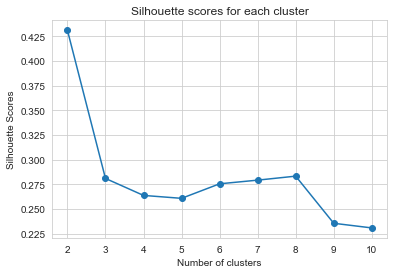

In [131]:
plt.plot(range(2, 11), silhouette_scores,marker='o')
plt.title('Silhouette scores for each cluster')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.show()

### 2 can be taken as the number of clusters

In [280]:
kmeans = KMeans(n_clusters=2, max_iter=600,random_state=0)
kmeans.fit(df_pca)
clusters = pd.DataFrame(kmeans.labels_+1,columns=['Cluster'])
df_pca_cluster = pd.concat([df_pca,clusters],axis=1)
cluster_obs = pd.DataFrame(clusters['Cluster'].value_counts()).reset_index()
cluster_obs.columns = ['Cluster','no_of_observations']

In [ ]:
# for i in df_pca_cluster.columns:
#     for j in df_pca_cluster.columns:
#         sns.lmplot(data=df_pca_cluster, x=i, y=j,hue='Cluster',fit_reg=False, legend=True, scatter_kws={"s": 2},legend_out=True)
#         plt.show()

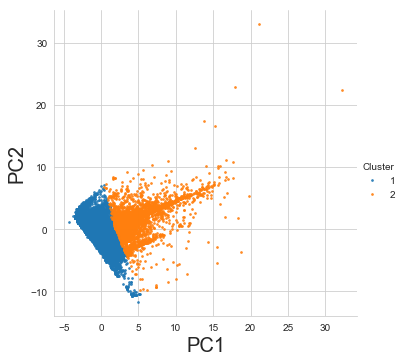

In [282]:
sns.lmplot(data=df_pca_cluster, x='PC1', y='PC2', hue='Cluster', fit_reg=False,scatter_kws={"s": 3})
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.show()

### Clustering on ICA

In [134]:
silhouette_scores = []
for cluster in range (2,11):
    kmeans = KMeans(n_clusters=cluster, max_iter=300,random_state=0)
    kmeans.fit(df_ica)
    cluster_labels = kmeans.fit_predict(df_ica)
    silhouette_scores.append(silhouette_score(df_ica, cluster_labels))

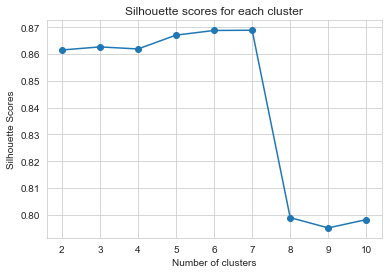

In [135]:
plt.plot(range(2, 11), silhouette_scores,marker='o')
plt.title('Silhouette scores for each cluster')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.show()

### 7 can be taken as the number of clusters

In [283]:
kmeans = KMeans(n_clusters=7, max_iter=600,random_state=0)
kmeans.fit(df_ica)
clusters = pd.DataFrame(kmeans.labels_+1,columns=['Cluster'])
df_ica_cluster = pd.concat([df_ica,clusters],axis=1)
cluster_obs = pd.DataFrame(clusters['Cluster'].value_counts()).reset_index()
cluster_obs.columns = ['Cluster','no_of_observations']

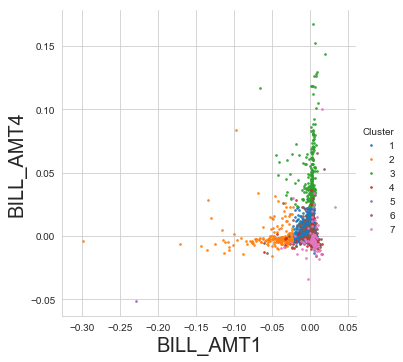

In [285]:
sns.lmplot(data=df_ica_cluster, x='BILL_AMT1', y='BILL_AMT4', hue='Cluster', fit_reg=False,scatter_kws={"s": 3})
plt.xlabel('BILL_AMT1',fontsize=20)
plt.ylabel('BILL_AMT4',fontsize=20)
plt.show()

### Clustering on RCA

In [137]:
silhouette_scores = []
for cluster in range (2,11):
    kmeans = KMeans(n_clusters=cluster, max_iter=300,random_state=0)
    kmeans.fit(df_rca)
    cluster_labels = kmeans.fit_predict(df_rca)
    wss_list.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_rca, cluster_labels))

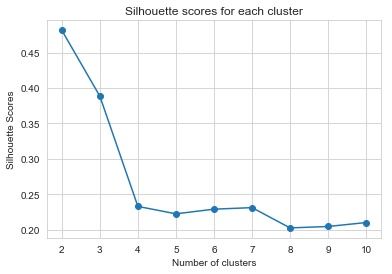

In [138]:
plt.plot(range(2, 11), silhouette_scores,marker='o')
plt.title('Silhouette scores for each cluster')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.show()

### 2 can be taken as the number of clusters

In [286]:
kmeans = KMeans(n_clusters=2, max_iter=600,random_state=0)
kmeans.fit(df_rca)
clusters = pd.DataFrame(kmeans.labels_+1,columns=['Cluster'])
df_rca_cluster = pd.concat([df_rca,clusters],axis=1)
cluster_obs = pd.DataFrame(clusters['Cluster'].value_counts()).reset_index()
cluster_obs.columns = ['Cluster','no_of_observations']

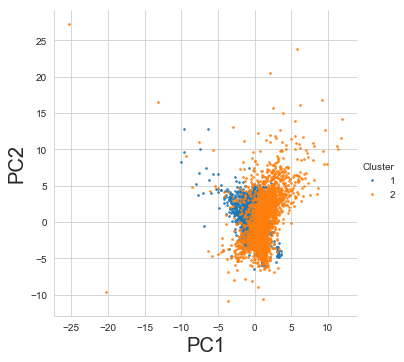

In [287]:
sns.lmplot(data=df_rca_cluster, x='PC1', y='PC2', hue='Cluster', fit_reg=False,scatter_kws={"s": 3})
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.show()

### EM Clustering on Decision Tree Selected Features

In [193]:
silhouette_scores = []
for cluster in range (2,11):
    em = GMM(n_components=cluster)
    cluster_labels = em.fit_predict(df_dt)
    silhouette_scores.append(silhouette_score(df_dt, cluster_labels))

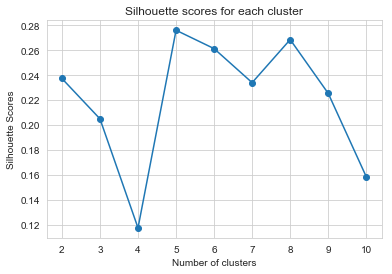

In [194]:
silhouette_plot(silhouette_scores)

In [288]:
em = GMM(n_components=5)
cluster_labels = em.fit_predict(df_dt)
clusters = pd.DataFrame(cluster_labels+1,columns=['Cluster'])
df_dt_em = pd.concat([df_dt,clusters],axis=1)
cluster_obs = pd.DataFrame(clusters['Cluster'].value_counts()).reset_index()
cluster_obs.columns = ['Cluster','no_of_observations']

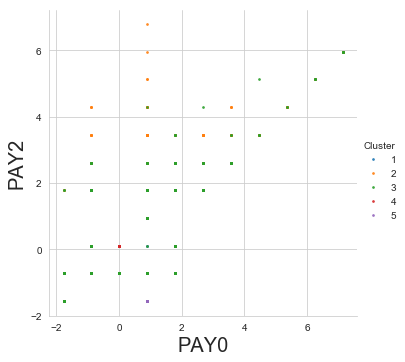

In [291]:
sns.lmplot(data=df_dt_em, x='PAY_0', y='PAY_2', hue='Cluster', fit_reg=False,scatter_kws={"s": 3})
plt.xlabel('PAY0',fontsize=20)
plt.ylabel('PAY2',fontsize=20)
plt.show()

### EM Clustering on PCA

In [188]:
silhouette_scores = []
for cluster in range (2,11):
    em = GMM(n_components=cluster)
    cluster_labels = em.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, cluster_labels))

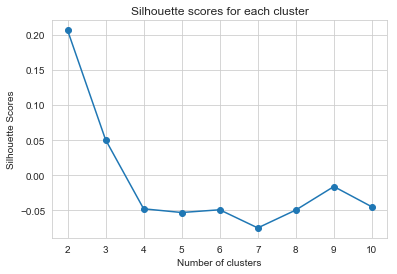

In [189]:
silhouette_plot(silhouette_scores)

In [192]:
em = GMM(n_components=2)
cluster_labels = em.fit_predict(df_pca)
clusters = pd.DataFrame(cluster_labels+1,columns=['Cluster'])
df_pca_em = pd.concat([df_pca,clusters],axis=1)
cluster_obs = pd.DataFrame(clusters['Cluster'].value_counts()).reset_index()
cluster_obs.columns = ['Cluster','no_of_observations']

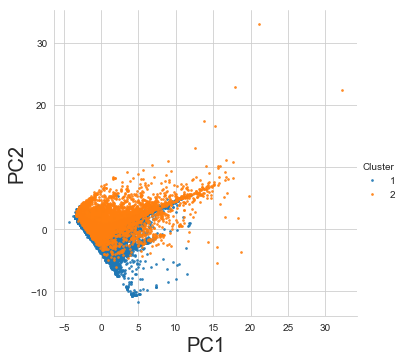

In [292]:
sns.lmplot(data=df_pca_em, x='PC1', y='PC2', hue='Cluster', fit_reg=False,scatter_kws={"s": 3})
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.show()

### EM Clustering on ICA

In [197]:
silhouette_scores = []
for cluster in range (2,11):
    em = GMM(n_components=cluster)
    cluster_labels = em.fit_predict(df_ica)
    silhouette_scores.append(silhouette_score(df_ica, cluster_labels))

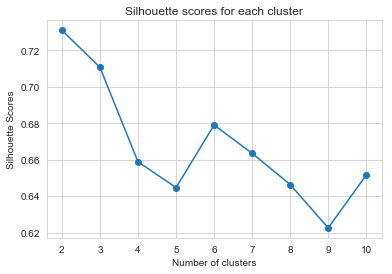

In [198]:
silhouette_plot(silhouette_scores)

In [293]:
em = GMM(n_components=2)
cluster_labels = em.fit_predict(df_ica)
clusters = pd.DataFrame(cluster_labels+1,columns=['Cluster'])
df_ica_em = pd.concat([df_ica,clusters],axis=1)
cluster_obs = pd.DataFrame(clusters['Cluster'].value_counts()).reset_index()
cluster_obs.columns = ['Cluster','no_of_observations']

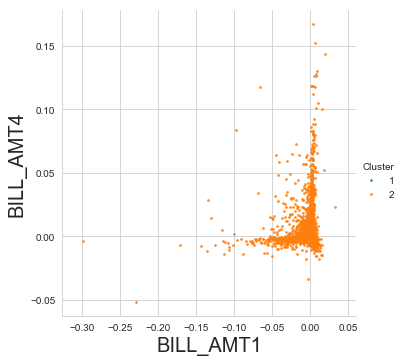

In [294]:
sns.lmplot(data=df_ica_em, x='BILL_AMT1', y='BILL_AMT4', hue='Cluster', fit_reg=False,scatter_kws={"s": 3})
plt.xlabel('BILL_AMT1',fontsize=20)
plt.ylabel('BILL_AMT4',fontsize=20)
plt.show()

### EM Clustering on RCA

In [202]:
silhouette_scores = []
for cluster in range (2,11):
    em = GMM(n_components=cluster)
    cluster_labels = em.fit_predict(df_rca)
    silhouette_scores.append(silhouette_score(df_rca, cluster_labels))

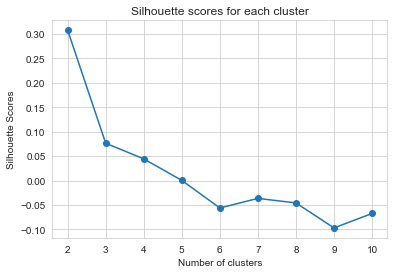

In [203]:
silhouette_plot(silhouette_scores)

In [295]:
em = GMM(n_components=2)
cluster_labels = em.fit_predict(df_rca)
clusters = pd.DataFrame(cluster_labels+1,columns=['Cluster'])
df_rca_em = pd.concat([df_rca,clusters],axis=1)
cluster_obs = pd.DataFrame(clusters['Cluster'].value_counts()).reset_index()
cluster_obs.columns = ['Cluster','no_of_observations']

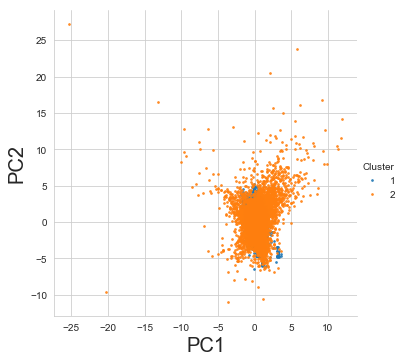

In [297]:
sns.lmplot(data=df_rca_em, x='PC1', y='PC2', hue='Cluster', fit_reg=False,scatter_kws={"s": 3})
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.show()

### Artificial Neural Networks - Decision Tree

In [329]:
from sklearn.utils import resample
x=df_dt
y=df['default_class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

xy_train = pd.concat([X_train, y_train], axis=1)
not_default = xy_train[xy_train['default_class']==0]
default = xy_train[xy_train['default_class']==1]

default_undersampled_df = resample(not_default, replace=True, n_samples=7000, random_state=17) 
undersampled_df = pd.concat([default, default_undersampled_df])
print(undersampled_df['default_class'].value_counts())

X_train = undersampled_df.loc[:,undersampled_df.columns != 'default_class']
y_train = undersampled_df['default_class']
X_train.head()


0    7000
1    4636
Name: default_class, dtype: int64


,PAY_0,PAY_2,PAY_AMT3,LIMIT_BAL,BILL_AMT1
8447,0.014861,0.111736,-0.068138,-0.751350,-0.377734
4535,0.904712,-1.558876,-0.296801,0.481833,-0.695642
27198,0.904712,-0.723570,-0.296801,-1.059646,-0.695642
15632,0.904712,-0.723570,-0.296801,-0.597202,-0.695642
17697,1.794564,0.111736,-0.296177,-0.828424,0.071429


### Experimenting with combination of neurons and layers

In [319]:
initial_neurons = [3, 4, 5]
layers_list = [2,3]
layer_neurons_df =pd.DataFrame()
acc_list = []
for layer_no in layers_list:
    neurons_combinations = [p for p in itertools.product(initial_neurons, repeat=layer_no)]
    for neurons in neurons_combinations:
        model = Sequential()
        for layer in range(1,layer_no+1):
            if (layer == 1):
                model.add(Dense(neurons[0], input_dim=5, activation='sigmoid'))
            else:
                model.add(Dense(neurons[layer-1],activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        optimizer_value = keras.optimizers.Adam(learning_rate=0.005)
        model.compile(optimizer=optimizer_value, loss='binary_crossentropy')
        model.fit(X_train, y_train, batch_size = 200,epochs=100,verbose=0)
        pred = model.predict_classes(X_test)
        f1 = f1_score(y_test,pred)
        values = [f1,layer_no,neurons]
        values = pd.DataFrame(values).T
        layer_neurons_df = pd.concat([layer_neurons_df,values])

layer_neurons_df.columns = ['F1 Score','Layer','Neurons']
top10 = layer_neurons_df.sort_values(by=['F1 Score'],ascending=False).head(10)

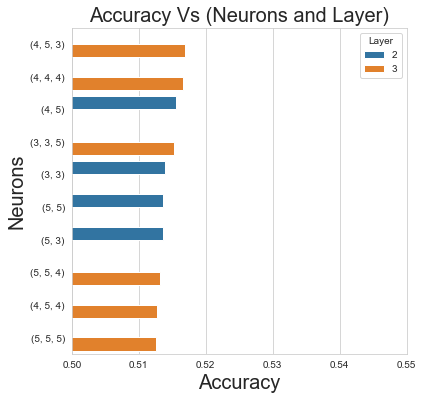

In [320]:
plt.figure(figsize=(6,6))
flatui = ["#9b59b6", "#3498db", "#95a5a6"]
sns.barplot(data=top10 ,x='F1 Score', y='Neurons',hue='Layer').set(xlim=(0.50, 0.55))
plt.title("Accuracy Vs (Neurons and Layer)",fontsize=20)
plt.xlabel("Accuracy",fontsize=20)
plt.ylabel("Neurons",fontsize=20)
plt.show()

### Experimenting with Neurons

In [321]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

epoch_list = [5,10,50,100,200]
y_train = pd.DataFrame(y_train)
epoch_df_validation = pd.DataFrame()
epoch_df_train = pd.DataFrame()

for epoch in epoch_list:
    scores_validation = []
    scores_train = []
    for train, test in kfold.split(X_train, y_train):
        train = train.tolist()
        test = test.tolist()
        
        model = Sequential()  ###Creating the model
        model.add(Dense(4, input_dim=5, activation='sigmoid'))    ###Adding layers
        model.add(Dense(5, activation='sigmoid'))
        model.add(Dense(3, activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
        model.compile(loss='binary_crossentropy', optimizer=optimizer_value)
        
        # Fitting the model and getting the training scores
        model.fit(X_train.iloc[train,:], y_train.iloc[train,:], batch_size=200,epochs=epoch, verbose=0)
        
        pred_train = model.predict_classes(X_train.iloc[train,:])
        train_scores = f1_score(y_train.iloc[train,:],pred_train)
        scores_train.append(train_scores)
        # Evaluating the model
        pred_test = model.predict_classes(X_train.iloc[test,:])
        validation_scores = f1_score(y_train.iloc[test,:],pred_test)
        scores_validation.append(validation_scores)
    
    print(epoch,"Training F1 Score: " ,np.mean(scores_train),"Validation F1 Score: ",np.mean(scores_validation))
    
    validation_values = [epoch,np.mean(scores_validation)]
    validation_values = pd.DataFrame(validation_values).T
    epoch_df_validation = pd.concat([epoch_df_validation,validation_values])
    
    train_values = [epoch,np.mean(scores_train)]
    train_values = pd.DataFrame(train_values).T
    epoch_df_train = pd.concat([epoch_df_train,train_values])
    
epoch_df_validation.columns = ['Epoch','F1 Score']
epoch_df_train.columns = ['Epoch','F1 Score']


5 Training F1 Score:  0.5766467560864653 Validation F1 Score:  0.5756409425343627
10 Training F1 Score:  0.5802094946919509 Validation F1 Score:  0.5782096640180818
50 Training F1 Score:  0.5961394423915161 Validation F1 Score:  0.5955006640760879
100 Training F1 Score:  0.5975087004416195 Validation F1 Score:  0.5925080529611323
200 Training F1 Score:  0.5900550051080391 Validation F1 Score:  0.5888828731796147


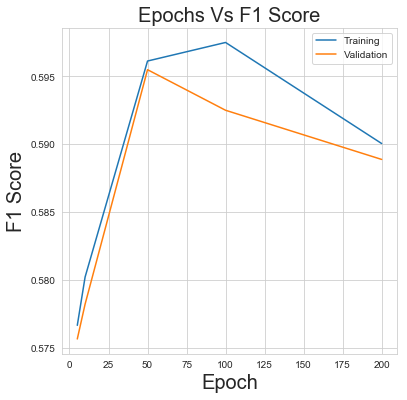

In [322]:
plt.figure(figsize=(6,6))
plt.plot(epoch_df_train['Epoch'],epoch_df_train['F1 Score'])
plt.plot(epoch_df_validation['Epoch'],epoch_df_validation['F1 Score'])
plt.title("Epochs Vs F1 Score",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.ylabel("F1 Score",fontsize=20)
plt.legend(['Training','Validation'])
plt.show()

### Test Data Predictions using the Optimal Parameters

In [331]:
model = Sequential()
model.add(Dense(4, input_dim=5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer_value, )

model.fit(X_train, y_train,batch_size = 200,epochs=300, verbose=0)
train_scores = model.evaluate(X_train, y_train, verbose=0)

pred_test = model.predict_classes(X_test)
f1_score(y_test, pred_test)

0.5052932761087268

### Artificial Neural Network - PCA

In [324]:
from sklearn.utils import resample
x=df_pca
y=df['default_class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

xy_train = pd.concat([X_train, y_train], axis=1)
not_default = xy_train[xy_train['default_class']==0]
default = xy_train[xy_train['default_class']==1]

default_undersampled_df = resample(not_default, replace=True, n_samples=7000, random_state=17) 
undersampled_df = pd.concat([default, default_undersampled_df])
print(undersampled_df['default_class'].value_counts())

X_train = undersampled_df.loc[:,undersampled_df.columns != 'default_class']
y_train = undersampled_df['default_class']
X_train.head()


0    7000
1    4636
Name: default_class, dtype: int64


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
8447,-0.545366,-0.977966,0.127922,1.032880,0.052598,-0.148324,-0.055389,0.132513,0.107216,-0.087851
4535,-2.920992,1.616887,-0.936633,-0.106633,-0.000571,0.018574,0.019430,-0.015458,0.155133,1.069975
27198,-0.325274,-1.172848,0.617576,0.169456,0.762014,-0.422855,0.175430,-0.520086,-0.909984,-0.105896
15632,-1.579774,-1.021792,0.019061,1.085198,0.084724,0.216125,-0.126143,0.048304,0.166852,-0.266043
17697,0.779474,-1.790803,-0.174803,-0.621806,0.129712,-0.147583,0.138706,-0.256608,0.158164,0.678760


### Experimenting with combination of neurons and layers

In [ ]:
initial_neurons = [3, 6, 10]
layers_list = [2,3]
layer_neurons_df =pd.DataFrame()
acc_list = []
for layer_no in layers_list:
    neurons_combinations = [p for p in itertools.product(initial_neurons, repeat=layer_no)]
    for neurons in neurons_combinations:
        model = Sequential()
        for layer in range(1,layer_no+1):
            if (layer == 1):
                model.add(Dense(neurons[0], input_dim=10, activation='sigmoid'))
            else:
                model.add(Dense(neurons[layer-1],activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        optimizer_value = keras.optimizers.Adam(learning_rate=0.005)
        model.compile(optimizer=optimizer_value, loss='binary_crossentropy')
        model.fit(X_train, y_train, batch_size = 200,epochs=100,verbose=0)
        pred = model.predict_classes(X_test)
        f1 = f1_score(y_test,pred)
        values = [f1,layer_no,neurons]
        values = pd.DataFrame(values).T
        layer_neurons_df = pd.concat([layer_neurons_df,values])

layer_neurons_df.columns = ['F1 Score','Layer','Neurons']
top10 = layer_neurons_df.sort_values(by=['F1 Score'],ascending=False).head(10)

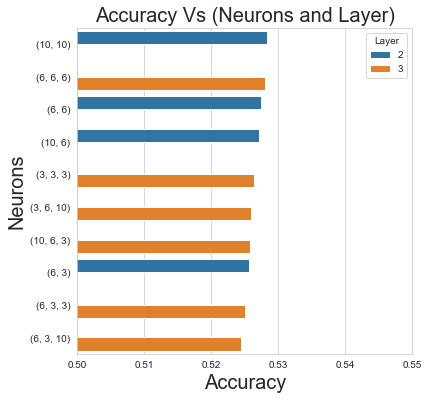

In [180]:
plt.figure(figsize=(6,6))
flatui = ["#9b59b6", "#3498db", "#95a5a6"]
sns.barplot(data=top10 ,x='F1 Score', y='Neurons',hue='Layer').set(xlim=(0.50, 0.55))
plt.title("Accuracy Vs (Neurons and Layer)",fontsize=20)
plt.xlabel("Accuracy",fontsize=20)
plt.ylabel("Neurons",fontsize=20)
plt.show()

### Experimenting with Epochs

In [279]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

epoch_list = [5,10,50,100,200]
y_train = pd.DataFrame(y_train)
epoch_df_validation = pd.DataFrame()
epoch_df_train = pd.DataFrame()

for epoch in epoch_list:
    scores_validation = []
    scores_train = []
    for train, test in kfold.split(X_train, y_train):
        train = train.tolist()
        test = test.tolist()
        
        model = Sequential()  ###Creating the model
        model.add(Dense(10, input_dim=10, activation='sigmoid'))    ###Adding layers
        model.add(Dense(10, activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
        model.compile(loss='binary_crossentropy', optimizer=optimizer_value)
        
        # Fitting the model and getting the training scores
        model.fit(X_train.iloc[train,:], y_train.iloc[train,:], batch_size=200,epochs=epoch, verbose=0)
        
        pred_train = model.predict_classes(X_train.iloc[train,:])
        train_scores = f1_score(y_train.iloc[train,:],pred_train)
        scores_train.append(train_scores)
        # Evaluating the model
        pred_test = model.predict_classes(X_train.iloc[test,:])
        validation_scores = f1_score(y_train.iloc[test,:],pred_test)
        scores_validation.append(validation_scores)
    
    print(epoch,"Training F1 Score: " ,np.mean(scores_train),"Validation F1 Score: ",np.mean(scores_validation))
    
    validation_values = [epoch,np.mean(scores_validation)]
    validation_values = pd.DataFrame(validation_values).T
    epoch_df_validation = pd.concat([epoch_df_validation,validation_values])
    
    train_values = [epoch,np.mean(scores_train)]
    train_values = pd.DataFrame(train_values).T
    epoch_df_train = pd.concat([epoch_df_train,train_values])
    
epoch_df_validation.columns = ['Epoch','F1 Score']
epoch_df_train.columns = ['Epoch','F1 Score']


5 Training F1 Score:  0.5711733211901884 Validation F1 Score:  0.5692724718847707
10 Training F1 Score:  0.5935319843719367 Validation F1 Score:  0.5893888214889405
50 Training F1 Score:  0.6171612704245567 Validation F1 Score:  0.6054758803666725
100 Training F1 Score:  0.6183804572808731 Validation F1 Score:  0.6085275799525427
200 Training F1 Score:  0.6259256578053309 Validation F1 Score:  0.6102948459339276


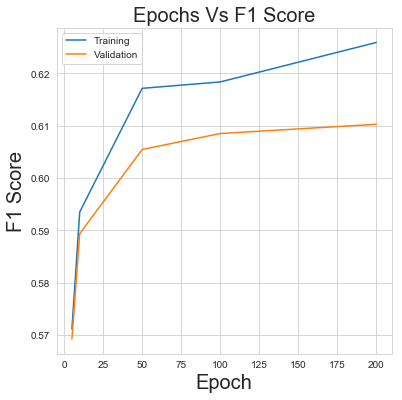

In [306]:
plt.figure(figsize=(6,6))
plt.plot(epoch_df_train['Epoch'],epoch_df_train['F1 Score'])
plt.plot(epoch_df_validation['Epoch'],epoch_df_validation['F1 Score'])
plt.title("Epochs Vs F1 Score",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.ylabel("F1 Score",fontsize=20)
plt.legend(['Training','Validation'])
plt.show()

### Test Data Predictions using the Optimal Parameters

In [325]:
model = Sequential()
model.add(Dense(10, input_dim=10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer_value, )

model.fit(X_train, y_train,batch_size = 200,epochs=300, verbose=0)
train_scores = model.evaluate(X_train, y_train, verbose=0)

pred_test = model.predict_classes(X_test)
f1_score(y_test, pred_test)

0.5242416385792067

### ANN on ICA

In [307]:
from sklearn.utils import resample
x=df_ica
y=df['default_class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

xy_train = pd.concat([X_train, y_train], axis=1)
not_default = xy_train[xy_train['default_class']==0]
default = xy_train[xy_train['default_class']==1]

default_undersampled_df = resample(not_default, replace=True, n_samples=7000, random_state=17) 
undersampled_df = pd.concat([default, default_undersampled_df])
print(undersampled_df['default_class'].value_counts())

X_train = undersampled_df.loc[:,undersampled_df.columns != 'default_class']
y_train = undersampled_df['default_class']
X_train.head()


0    7000
1    4636
Name: default_class, dtype: int64


,PAY_AMT6,BILL_AMT1,PAY_5,PAY_AMT2,BILL_AMT4
8447,0.000285,-0.000146,0.000446,-0.001069,-0.000992
4535,-0.000600,0.000751,0.000858,-0.000864,-0.001026
27198,-0.001432,0.000338,-0.009190,-0.001062,-0.000869
15632,-0.000458,0.000849,0.000632,-0.001831,-0.000372
17697,-0.000549,0.000232,0.000572,-0.000964,-0.000638


In [207]:
y_train.value_counts()

0    7000
1    4636
Name: default_class, dtype: int64

In [208]:
initial_neurons = [3,4,5]
layers_list = [2,3]
layer_neurons_df =pd.DataFrame()
for layer_no in layers_list:
    neurons_combinations = [p for p in itertools.product(initial_neurons, repeat=layer_no)]
    for neurons in neurons_combinations:
        model = Sequential()
        for layer in range(1,layer_no+1):
            if (layer == 1):
                model.add(Dense(neurons[0], input_dim=5, activation='sigmoid'))
            else:
                model.add(Dense(neurons[layer-1],activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        optimizer_value = keras.optimizers.Adam(learning_rate=0.005)
        model.compile(optimizer=optimizer_value, loss='binary_crossentropy')
        model.fit(X_train, y_train, batch_size = 200,epochs=100,verbose=0)
        pred = model.predict_classes(X_test)
        f1 = f1_score(y_test,pred)
        values = [f1,layer_no,neurons]
        values = pd.DataFrame(values).T
        layer_neurons_df = pd.concat([layer_neurons_df,values])

layer_neurons_df.columns = ['F1 Score','Layer','Neurons']
top10 = layer_neurons_df.sort_values(by=['F1 Score'],ascending=False).head(10)

C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

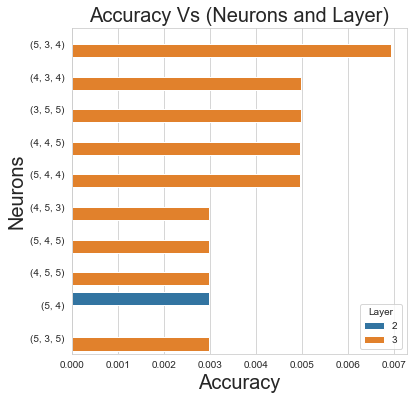

In [212]:
plt.figure(figsize=(6,6))
flatui = ["#9b59b6", "#3498db", "#95a5a6"]
sns.barplot(data=top10 ,x='F1 Score', y='Neurons',hue='Layer')
plt.title("Accuracy Vs (Neurons and Layer)",fontsize=20)
plt.xlabel("Accuracy",fontsize=20)
plt.ylabel("Neurons",fontsize=20)
plt.show()

### Experimenting with Epochs

In [308]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

epoch_list = [5,10,50,100,200]
y_train = pd.DataFrame(y_train)
epoch_df_validation = pd.DataFrame()
epoch_df_train = pd.DataFrame()

for epoch in epoch_list:
    scores_validation = []
    scores_train = []
    for train, test in kfold.split(X_train, y_train):
        train = train.tolist()
        test = test.tolist()
        
        model = Sequential()  ###Creating the model
        model.add(Dense(5, input_dim=5, activation='sigmoid'))    ###Adding layers
        model.add(Dense(4, activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
        model.compile(loss='binary_crossentropy', optimizer=optimizer_value)
        
        # Fitting the model and getting the training scores
        model.fit(X_train.iloc[train,:], y_train.iloc[train,:], batch_size=200,epochs=epoch, verbose=0)
        
        pred_train = model.predict_classes(X_train.iloc[train,:])
        train_scores = f1_score(y_train.iloc[train,:],pred_train)
        scores_train.append(train_scores)
        # Evaluating the model
        pred_test = model.predict_classes(X_train.iloc[test,:])
        validation_scores = f1_score(y_train.iloc[test,:],pred_test)
        scores_validation.append(validation_scores)
    
    print(epoch,"Training F1 Score: " ,np.mean(scores_train),"Validation F1 Score: ",np.mean(scores_validation))
    
    validation_values = [epoch,np.mean(scores_validation)]
    validation_values = pd.DataFrame(validation_values).T
    epoch_df_validation = pd.concat([epoch_df_validation,validation_values])
    
    train_values = [epoch,np.mean(scores_train)]
    train_values = pd.DataFrame(train_values).T
    epoch_df_train = pd.concat([epoch_df_train,train_values])
    
epoch_df_validation.columns = ['Epoch','F1 Score']
epoch_df_train.columns = ['Epoch','F1 Score']


C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

5 Training F1 Score:  0.0 Validation F1 Score:  0.0


C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

10 Training F1 Score:  0.0 Validation F1 Score:  0.0


C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

50 Training F1 Score:  0.000752632244660618 Validation F1 Score:  0.0008620689655172414
100 Training F1 Score:  0.005889402366968264 Validation F1 Score:  0.005562493689728665
200 Training F1 Score:  0.006393412812895577 Validation F1 Score:  0.007679671644299074


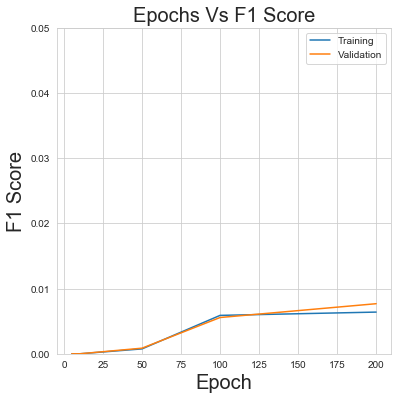

In [314]:
plt.figure(figsize=(6,6))
plt.plot(epoch_df_train['Epoch'],epoch_df_train['F1 Score'])
plt.plot(epoch_df_validation['Epoch'],epoch_df_validation['F1 Score'])
plt.ylim(0,0.05)
plt.title("Epochs Vs F1 Score",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.ylabel("F1 Score",fontsize=20)
plt.legend(['Training','Validation'])
plt.show()

### ANN on RCA

In [327]:
from sklearn.utils import resample
x=df_rca
y=df['default_class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

xy_train = pd.concat([X_train, y_train], axis=1)
not_default = xy_train[xy_train['default_class']==0]
default = xy_train[xy_train['default_class']==1]

default_undersampled_df = resample(not_default, replace=True, n_samples=7000, random_state=17) 
undersampled_df = pd.concat([default, default_undersampled_df])
print(undersampled_df['default_class'].value_counts())

X_train = undersampled_df.loc[:,undersampled_df.columns != 'default_class']
y_train = undersampled_df['default_class']
X_train.head()


0    7000
1    4636
Name: default_class, dtype: int64


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
8447,-0.195920,-0.331927,-0.407054,-0.003110,0.719304,0.382882,0.660309,0.503445,0.852950,1.115675
4535,-0.986443,0.851445,-1.327588,-0.705354,0.742871,-1.565562,-0.730731,0.384236,0.768721,-1.923560
27198,-0.570309,-1.363893,0.817510,0.744115,0.256953,0.989521,0.672180,-0.239919,2.674514,0.211777
15632,-0.855008,-0.996181,-1.286461,-1.193727,1.288429,0.487885,0.090664,1.383194,2.498880,2.673425
17697,-0.007803,-0.200894,0.475100,-0.318563,-0.130732,0.171585,0.681279,-1.295339,1.526094,-0.196855


In [215]:
initial_neurons = [3,6,10]
layers_list = [2,3]
layer_neurons_df =pd.DataFrame()
for layer_no in layers_list:
    neurons_combinations = [p for p in itertools.product(initial_neurons, repeat=layer_no)]
    for neurons in neurons_combinations:
        model = Sequential()
        for layer in range(1,layer_no+1):
            if (layer == 1):
                model.add(Dense(neurons[0], input_dim=10, activation='sigmoid'))
            else:
                model.add(Dense(neurons[layer-1],activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        optimizer_value = keras.optimizers.Adam(learning_rate=0.005)
        model.compile(optimizer=optimizer_value, loss='binary_crossentropy')
        model.fit(X_train, y_train, batch_size = 200,epochs=100,verbose=0)
        pred = model.predict_classes(X_test)
        f1 = f1_score(y_test,pred)
        values = [f1,layer_no,neurons]
        values = pd.DataFrame(values).T
        layer_neurons_df = pd.concat([layer_neurons_df,values])

layer_neurons_df.columns = ['F1 Score','Layer','Neurons']
top10 = layer_neurons_df.sort_values(by=['F1 Score'],ascending=False).head(10)

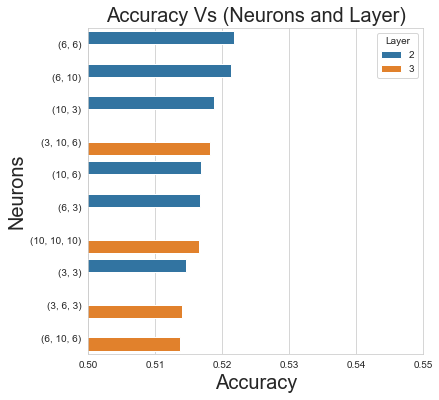

In [217]:
plt.figure(figsize=(6,6))
flatui = ["#9b59b6", "#3498db", "#95a5a6"]
sns.barplot(data=top10 ,x='F1 Score', y='Neurons',hue='Layer').set(xlim=(0.50, 0.55))
plt.title("Accuracy Vs (Neurons and Layer)",fontsize=20)
plt.xlabel("Accuracy",fontsize=20)
plt.ylabel("Neurons",fontsize=20)
plt.show()

### Experimenting with Epochs

In [316]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

epoch_list = [5,10,50,100,200]
y_train = pd.DataFrame(y_train)
epoch_df_validation = pd.DataFrame()
epoch_df_train = pd.DataFrame()

for epoch in epoch_list:
    scores_validation = []
    scores_train = []
    for train, test in kfold.split(X_train, y_train):
        train = train.tolist()
        test = test.tolist()
        
        model = Sequential()  ###Creating the model
        model.add(Dense(10, input_dim=10, activation='sigmoid'))    ###Adding layers
        model.add(Dense(10, activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
        model.compile(loss='binary_crossentropy', optimizer=optimizer_value)
        
        # Fitting the model and getting the training scores
        model.fit(X_train.iloc[train,:], y_train.iloc[train,:], batch_size=200,epochs=epoch, verbose=0)
        
        pred_train = model.predict_classes(X_train.iloc[train,:])
        train_scores = f1_score(y_train.iloc[train,:],pred_train)
        scores_train.append(train_scores)
        # Evaluating the model
        pred_test = model.predict_classes(X_train.iloc[test,:])
        validation_scores = f1_score(y_train.iloc[test,:],pred_test)
        scores_validation.append(validation_scores)
    
    print(epoch,"Training F1 Score: " ,np.mean(scores_train),"Validation F1 Score: ",np.mean(scores_validation))
    
    validation_values = [epoch,np.mean(scores_validation)]
    validation_values = pd.DataFrame(validation_values).T
    epoch_df_validation = pd.concat([epoch_df_validation,validation_values])
    
    train_values = [epoch,np.mean(scores_train)]
    train_values = pd.DataFrame(train_values).T
    epoch_df_train = pd.concat([epoch_df_train,train_values])
    
epoch_df_validation.columns = ['Epoch','F1 Score']
epoch_df_train.columns = ['Epoch','F1 Score']


5 Training F1 Score:  0.5681391878890188 Validation F1 Score:  0.5660239112611904
10 Training F1 Score:  0.5793590277616303 Validation F1 Score:  0.5763260414403
50 Training F1 Score:  0.6089645074491827 Validation F1 Score:  0.6004645022273165
100 Training F1 Score:  0.6155655509703878 Validation F1 Score:  0.602845057612194
200 Training F1 Score:  0.6268571010745325 Validation F1 Score:  0.606065395900828


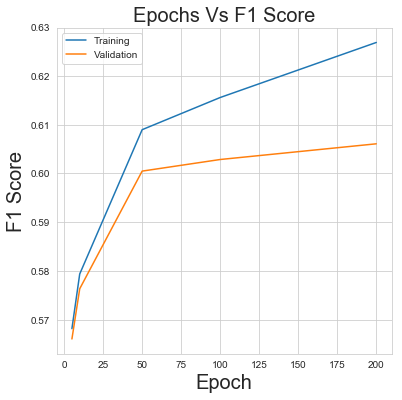

In [317]:
plt.figure(figsize=(6,6))
plt.plot(epoch_df_train['Epoch'],epoch_df_train['F1 Score'])
plt.plot(epoch_df_validation['Epoch'],epoch_df_validation['F1 Score'])
plt.title("Epochs Vs F1 Score",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.ylabel("F1 Score",fontsize=20)
plt.legend(['Training','Validation'])
plt.show()

### Test Data Predictions using the Optimal Parameters

In [328]:
model = Sequential()
model.add(Dense(10, input_dim=10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer_value, )

model.fit(X_train, y_train,batch_size = 200,epochs=300, verbose=0)
train_scores = model.evaluate(X_train, y_train, verbose=0)

pred_test = model.predict_classes(X_test)
f1_score(y_test, pred_test)

0.5055284134739007

### ANN on Clustering results

In [332]:
df_both_clusters = pd.concat([df_cluster_kmeans['Cluster'],df_cluster_em['Cluster']],axis=1)
df_both_clusters.columns = ['kmeans','em']
df_both_clusters = df_both_clusters.astype(str) 
df_both_clusters = pd.get_dummies(df_both_clusters)
x=df_both_clusters
y=df['default_class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

xy_train = pd.concat([X_train, y_train], axis=1)
not_default = xy_train[xy_train['default_class']==0]
default = xy_train[xy_train['default_class']==1]

default_undersampled_df = resample(not_default, replace=True, n_samples=7000, random_state=17) 
undersampled_df = pd.concat([default, default_undersampled_df])
print(undersampled_df['default_class'].value_counts())

X_train = undersampled_df.loc[:,undersampled_df.columns != 'default_class']
y_train = undersampled_df['default_class']
X_train.head()


0    7000
1    4636
Name: default_class, dtype: int64


,kmeans_1,kmeans_2,em_1,em_2
8447,0,1,0,1
4535,0,1,0,1
27198,0,1,1,0
15632,0,1,0,1
17697,0,1,0,1


In [251]:
initial_neurons = [2,3,4]
layers_list = [2,3]
layer_neurons_df =pd.DataFrame()
acc_list = []
for layer_no in layers_list:
    neurons_combinations = [p for p in itertools.product(initial_neurons, repeat=layer_no)]
    for neurons in neurons_combinations:
        model = Sequential()
        for layer in range(1,layer_no+1):
            if (layer == 1):
                model.add(Dense(neurons[0], input_dim=4, activation='sigmoid'))
            else:
                model.add(Dense(neurons[layer-1],activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        optimizer_value = keras.optimizers.Adam(learning_rate=0.005)
        model.compile(optimizer=optimizer_value, loss='binary_crossentropy')
        model.fit(X_train, y_train, batch_size = 200,epochs=100,verbose=0)
        pred = model.predict_classes(X_test)
        f1 = f1_score(y_test,pred)
        values = [f1,layer_no,neurons]
        values = pd.DataFrame(values).T
        layer_neurons_df = pd.concat([layer_neurons_df,values])

layer_neurons_df.columns = ['F1 Score','Layer','Neurons']
top10 = layer_neurons_df.sort_values(by=['F1 Score'],ascending=False).head(10)

C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

In [252]:
top10

,F1 Score,Layer,Neurons
0,0,2,"(2, 2)"
0,0,2,"(2, 3)"
0,0,3,"(3, 2, 4)"
0,0,3,"(3, 3, 2)"
0,0,3,"(3, 3, 3)"
0,0,3,"(3, 3, 4)"
0,0,3,"(3, 4, 2)"
0,0,3,"(3, 4, 3)"
0,0,3,"(3, 4, 4)"
0,0,3,"(4, 2, 2)"


In [333]:
model = Sequential()
model.add(Dense(2, input_dim=4, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer_value, )

model.fit(X_train, y_train,batch_size = 200,epochs=300, verbose=0)
train_scores = model.evaluate(X_train, y_train, verbose=0)

pred_test = model.predict_classes(X_test)
f1_score(y_test, pred_test)

C:\Users\aashe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [338]:
df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_class'],
      dtype='object')

In [336]:
final_temp = df.iloc[X_test.index.tolist(),[8,9,20]]
final_temp['pred'] = pred_test

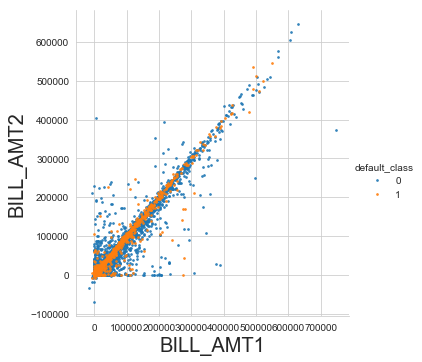

In [339]:
sns.lmplot(data=final_temp, x='BILL_AMT1', y='BILL_AMT2', hue='default_class', fit_reg=False,scatter_kws={"s": 3})
plt.xlabel('BILL_AMT1',fontsize=20)
plt.ylabel('BILL_AMT2',fontsize=20)
plt.show()

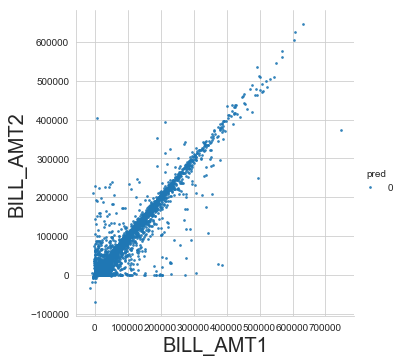

In [340]:
sns.lmplot(data=final_temp, x='BILL_AMT1', y='BILL_AMT2', hue='pred', fit_reg=False,scatter_kws={"s": 3})
plt.xlabel('BILL_AMT1',fontsize=20)
plt.ylabel('BILL_AMT2',fontsize=20)
plt.show()